# SMOTE 

In [1]:
import matplotlib.pyplot as plt 
import pandas as pd 
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report , precision_recall_curve, auc 
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import NearMiss 
from imblearn.combine import SMOTEENN

In [2]:
credit_card = pd.read_csv('dataset/creditcard.csv')

In [3]:
X = credit_card.drop('Class', axis =1 )
y = credit_card['Class']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

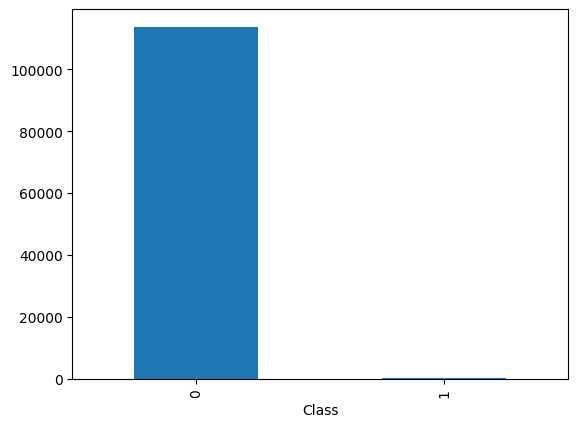

In [5]:
y_test.value_counts().plot(kind='bar'); 

In [6]:
# Oversampling techniques using smote 
smote = SMOTE( sampling_strategy='auto', random_state=None, k_neighbors=5, n_jobs=None)


In [7]:
X_resampled , y_resampled = smote.fit_resample(X_train, y_train)

<Axes: xlabel='Class'>

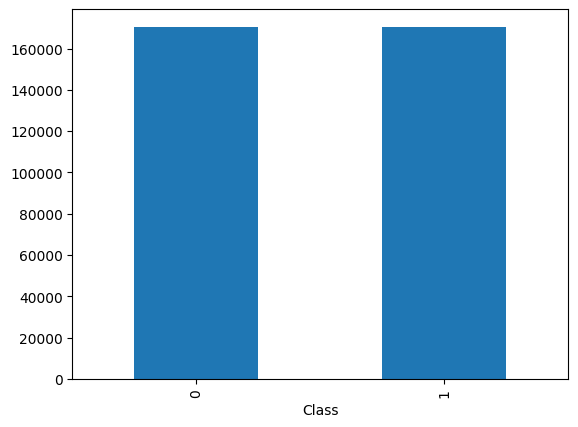

In [8]:
y_resampled.value_counts().plot(kind= 'bar')

In [9]:
# we have massively generated the synthetic minority samples which cannot be the good  respresenatative of the data 
# lets try to make a model through this 
rf_model_sm = RandomForestClassifier( random_state = 42 ) 
rf_model_sm.fit(X_resampled, y_resampled )

RandomForestClassifier(random_state=42)

In [10]:
y_pred  = rf_model_sm.predict(X_test)
result =  classification_report(y_test, y_pred)

In [11]:
print(result)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113732
           1       0.84      0.85      0.85       191

    accuracy                           1.00    113923
   macro avg       0.92      0.93      0.92    113923
weighted avg       1.00      1.00      1.00    113923



In [12]:
y_pred_proba = rf_model_sm.predict_proba(X_test)[:, 1]


In [13]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
auprc = auc(recall, precision)


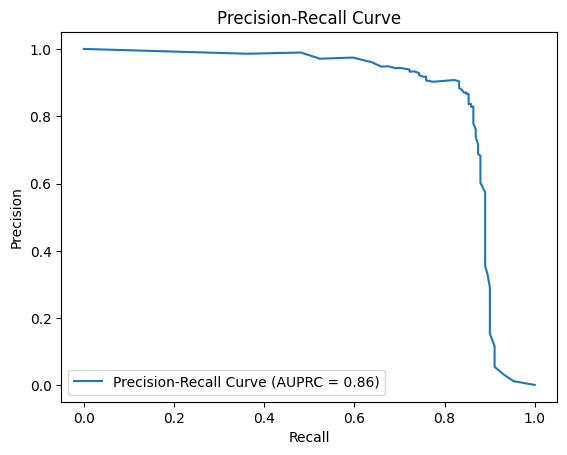

In [14]:
# Plot the Precision-Recall Curve
plt.plot(recall, precision, label='Precision-Recall Curve (AUPRC = %0.2f)' % auprc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

In [15]:
# ADASYN 
adasyn = ADASYN(random_state=42)
X_resampled_a, y_resampled_a = adasyn.fit_resample(X_train, y_train)


<Axes: xlabel='Class'>

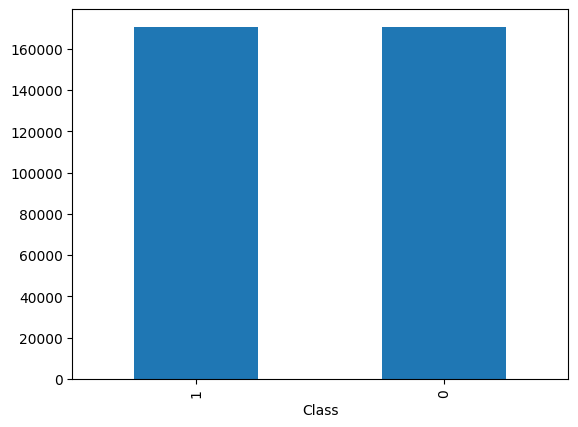

In [16]:
y_resampled_a.value_counts().plot(kind= 'bar')

In [17]:
rf_model_adasync = RandomForestClassifier(random_state = 42)
rf_model_adasync.fit(X_resampled_a, y_resampled_a)

RandomForestClassifier(random_state=42)

In [18]:
y_pred_a  = rf_model_sm.predict(X_test)
result =  classification_report(y_test, y_pred_a)
print(result)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113732
           1       0.84      0.85      0.85       191

    accuracy                           1.00    113923
   macro avg       0.92      0.93      0.92    113923
weighted avg       1.00      1.00      1.00    113923



In [19]:
y_pred_proba_ada = rf_model_sm.predict_proba(X_test)[:, 1]
precision_ada, recall_ada, thresholds = precision_recall_curve(y_test, y_pred_proba_ada)
auprc_ada = auc(recall_ada, precision_ada)

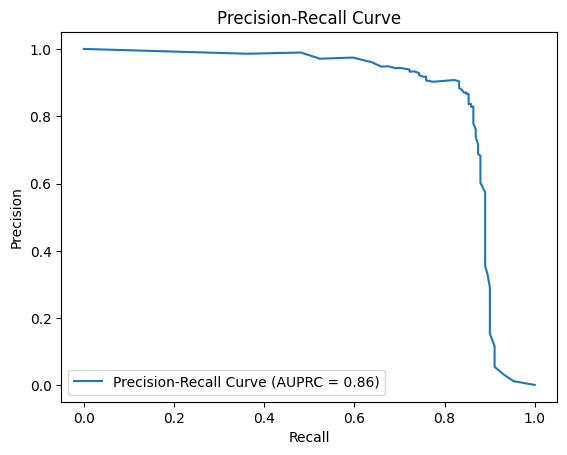

In [20]:
# Plot the Precision-Recall Curve
plt.plot(recall, precision, label='Precision-Recall Curve (AUPRC = %0.2f)' % auprc_ada)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

In [21]:
# so both of the oversampling techniques offer similar result. 

In [22]:
# lets try to have optimum sampling and improve the models 

In [23]:
nm1 = NearMiss(version = 1)
X_res, y_res = nm1.fit_resample(X_train, y_train )

In [24]:
y_res.value_counts()

Class
0    301
1    301
Name: count, dtype: int64

In [25]:
rf_under_sampled_model = RandomForestClassifier(random_state = 42)
rf_under_sampled_model.fit(X_res, y_res)

RandomForestClassifier(random_state=42)

In [26]:
y_pred_proba = rf_under_sampled_model.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
auprc = auc(recall, precision)

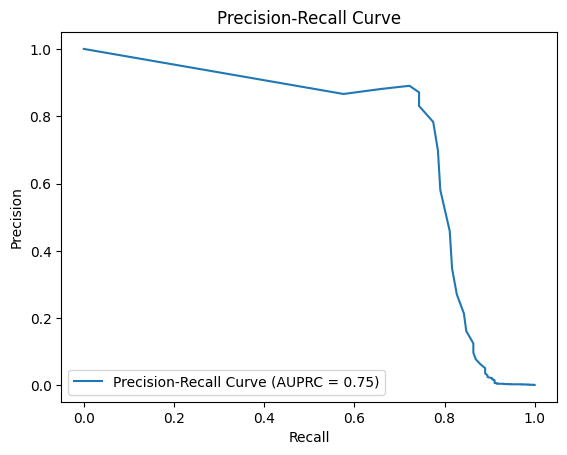

In [27]:
# Plot the Precision-Recall Curve
plt.plot(recall, precision, label='Precision-Recall Curve (AUPRC = %0.2f)' % auprc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

In [28]:
# undersampling has further degraded the model 

In [29]:
# lets use the combination of over and under sampling 

In [30]:
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

In [31]:
y_resampled.value_counts()

Class
1    161734
0    155123
Name: count, dtype: int64

In [32]:
rf_model_comb = RandomForestClassifier()
rf_model_comb.fit(X_resampled, y_resampled)

RandomForestClassifier()

In [33]:
y_pred_proba = rf_model_comb.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
auprc = auc(recall, precision)

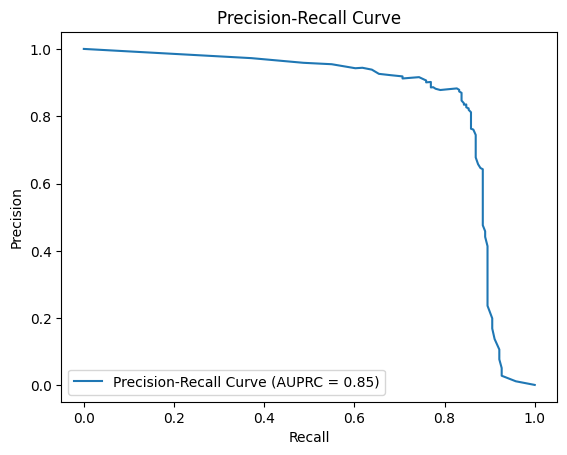

In [34]:
# Plot the Precision-Recall Curve
plt.plot(recall, precision, label='Precision-Recall Curve (AUPRC = %0.2f)' % auprc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

In [35]:
# so undersampling the dataset is a bad idea so the better option is to oversample the minority classes 

In [36]:
# lets oversample but with a little bit of consideration to know vastly generate the synthetic samples 
smote = SMOTE(sampling_strategy = {1: 10000})

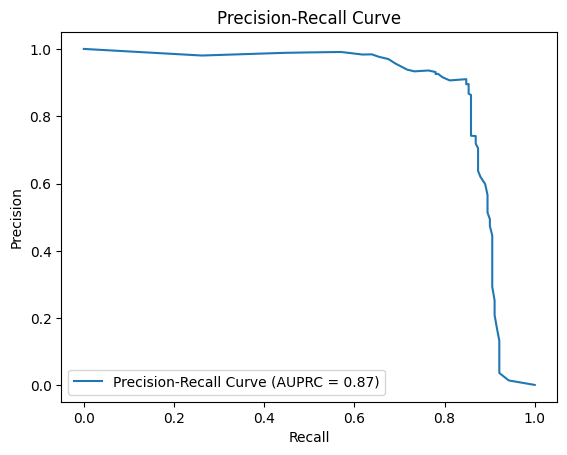

In [37]:
smote = SMOTE(sampling_strategy = {1: 10000})
X_resampled , y_resampled = smote.fit_resample(X_train, y_train)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_resampled, y_resampled)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
auprc = auc(recall, precision)
# Plot the Precision-Recall Curve
plt.plot(recall, precision, label='Precision-Recall Curve (AUPRC = %0.2f)' % auprc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

In [38]:
X_resampled , y_resampled = smote.fit_resample(X_train, y_train)

In [39]:
y_resampled.value_counts()

Class
0    170583
1     10000
Name: count, dtype: int64

In [40]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

In [41]:
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
auprc = auc(recall, precision)

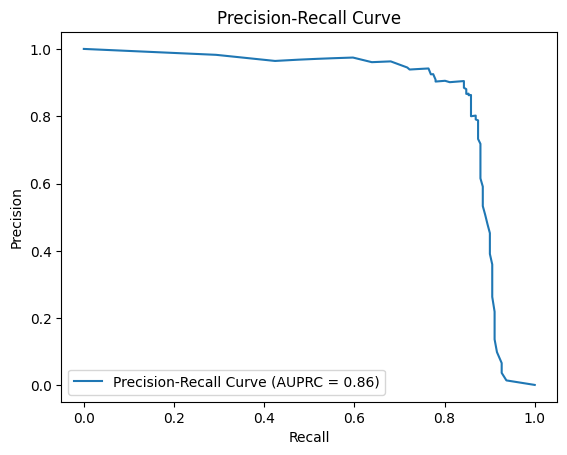

In [42]:
# Plot the Precision-Recall Curve
plt.plot(recall, precision, label='Precision-Recall Curve (AUPRC = %0.2f)' % auprc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

In [ ]:
# smote can be used to oversample the data  , undersampling reduces our performance so we will be oversampling our dataset to 
# certain extent 